In [1]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import os
import pandas as pd
from scipy.fftpack import fft,ifft

In [2]:
lc = pd.read_csv('lc_lgrb.csv')
time = lc['Time']
rate = lc['Counts_s']
print(time.min(),time.max())

50 123370


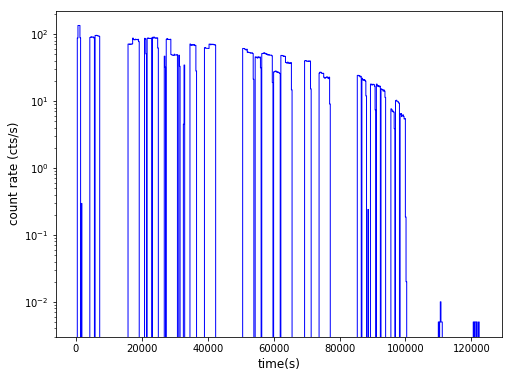

In [3]:
dt = 200
time_list = np.arange(0, 123370+dt, dt)
rate_list = []
for i in range(1,len(time_list)):
    ints = (time<time_list[i])&(time>=time_list[i-1])
    rate_new = np.mean(rate[ints])
    rate_list.append(rate_new)

rate_list = np.array(rate_list)
rate_list[np.isnan(rate_list)] = 0
time_list = np.arange(0, 123370, dt)

fig = plt.figure(figsize=[8,6])
ax = fig.add_subplot(111)
ax.set_yscale("log")
#ax.set_xscale("log")
ax.set_xlabel('time(s)',fontsize=12)
ax.set_ylabel('count rate (cts/s)',fontsize=12)
#ax1.scatter(time_list,rate_clean,c='blue',marker='o',s=1.5) 
ax.step(time_list,rate_list,'b-',linewidth=1,where='post')
plt.show()

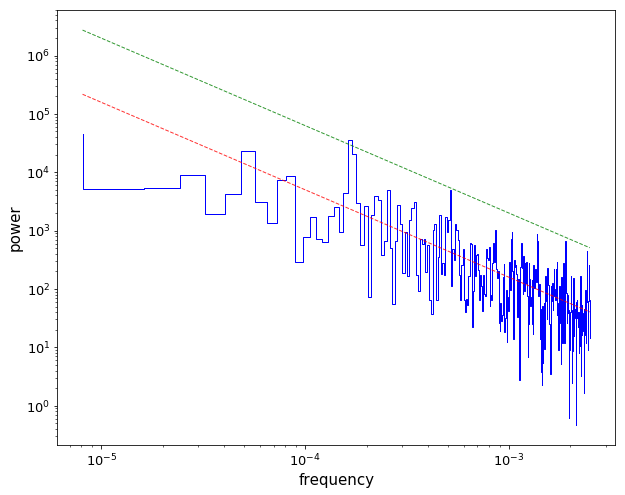

In [13]:
#psd

N = len(rate_list)

nf = N/2    # Nyquist
df = 1/(dt*N)
F_a = np.arange(nf+1)
F = [i*df for i in F_a]
F1 = F[1:int(nf)]    # 除去f=0及f=f_Nyquist
mean_x = np.mean(rate_list)
dft = fft(rate_list-mean_x)
dft1 = dft[1:int(nf)]
per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
p_times_f_data = np.multiply(np.array(F1),np.array(per_data))

F1 = np.array(F1)
line = F1**(-1.5)*(10**(-2.3))
line2 = F1**(-1.5)*(10**(-1.2))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(F1, per_data, color="b", linewidth=1)
plt.plot(F1, line, "r--", alpha=0.8, linewidth=1)
plt.plot(F1, line2, "g--", alpha=0.8, linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

perlist = {'f':F1,'per':per_data}
test = pd.DataFrame(perlist,columns = ['f','per'])
test.to_csv('perlist_lgrb.csv')